# Import Libraries and Dataset

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from datetime import datetime

from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report

import pickle

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

## Age Demography

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

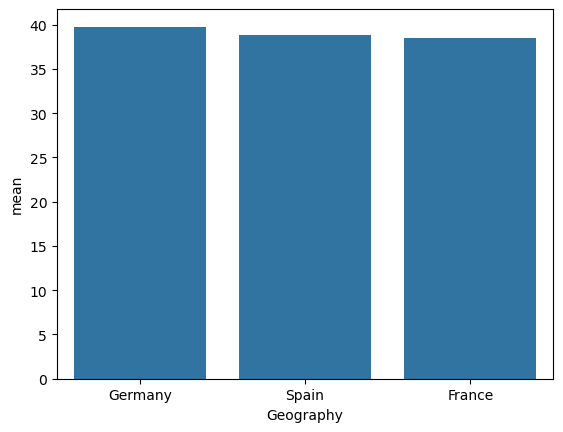

In [10]:
visual = df.groupby(['Geography'])['Age'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)

ax = sns.barplot(x="Geography", y="mean", data=visual)

## Credit Score Demography

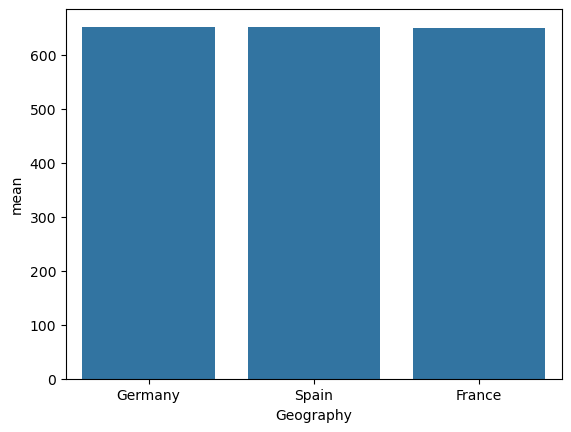

In [12]:
visual = df.groupby(['Geography'])['CreditScore'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

## Estimated Salary Demography

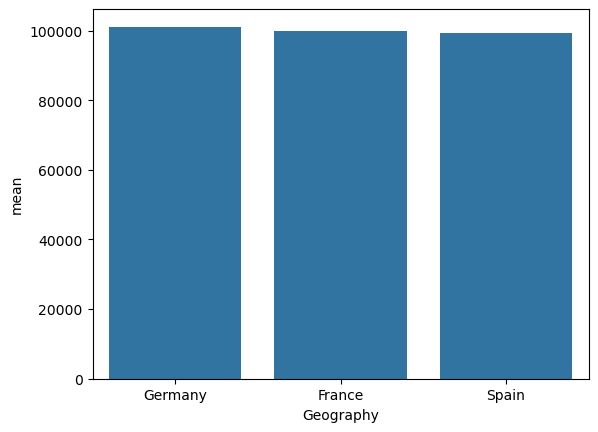

In [14]:
visual = df.groupby(['Geography'])['EstimatedSalary'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

## Exited Column Analysis

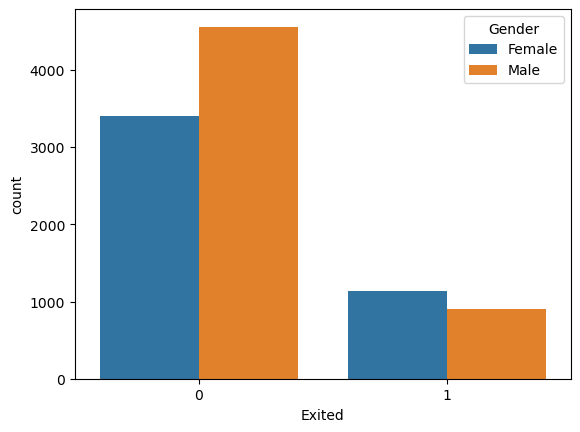

In [16]:
ax = sns.countplot(x="Exited", hue="Gender", data=df)

In [17]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

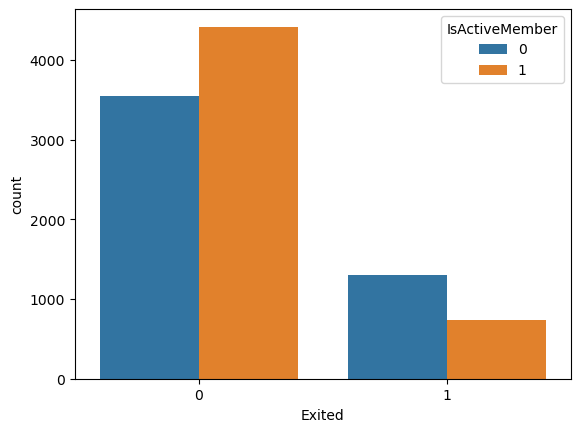

In [18]:
ax = sns.countplot(x="Exited", hue="IsActiveMember", data=df)

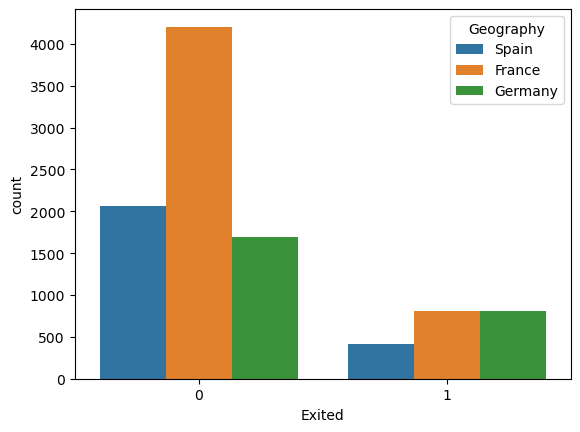

In [19]:
ax = sns.countplot(x="Exited", hue="Geography", data=df)

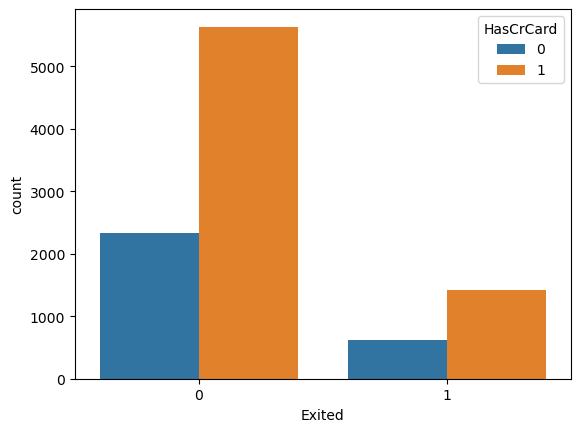

In [20]:
ax = sns.countplot(x="Exited", hue="HasCrCard", data=df)

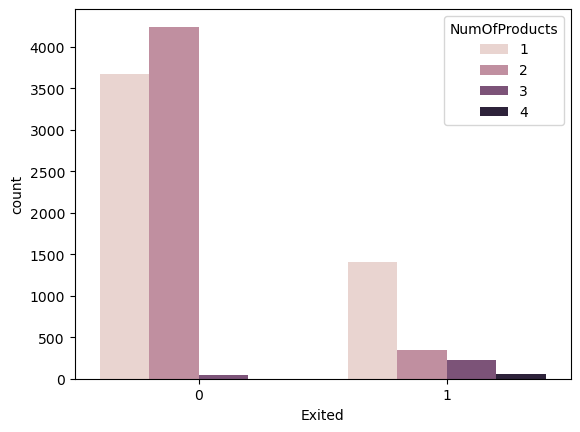

In [21]:
ax = sns.countplot(x="Exited", hue="NumOfProducts", data=df)

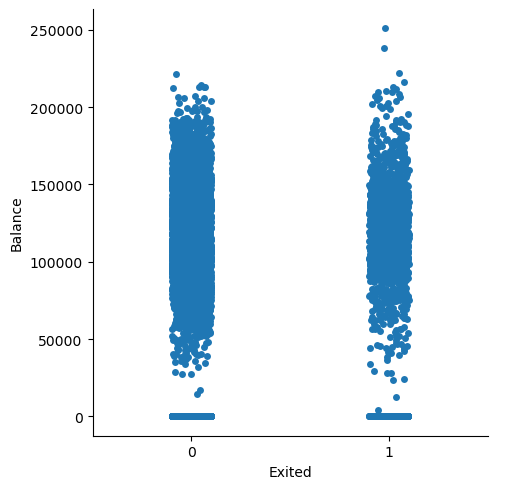

In [22]:
g = sns.catplot(x="Exited", y="Balance", data=df)

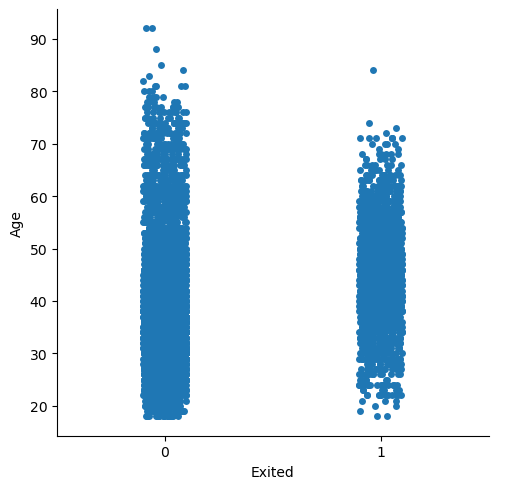

In [23]:
g = sns.catplot(x="Exited", y="Age", data=df)

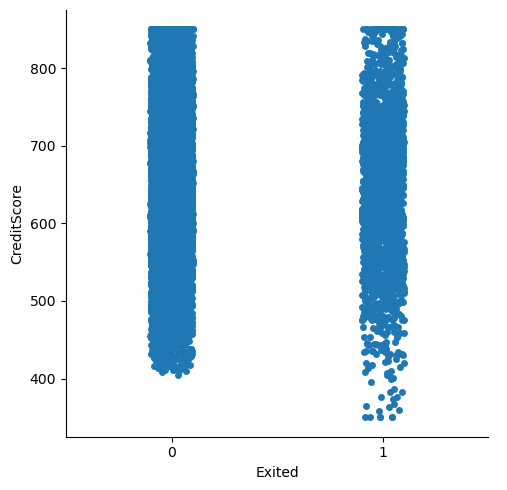

In [24]:
g = sns.catplot(x="Exited", y="CreditScore", data=df)

## Correlation Map

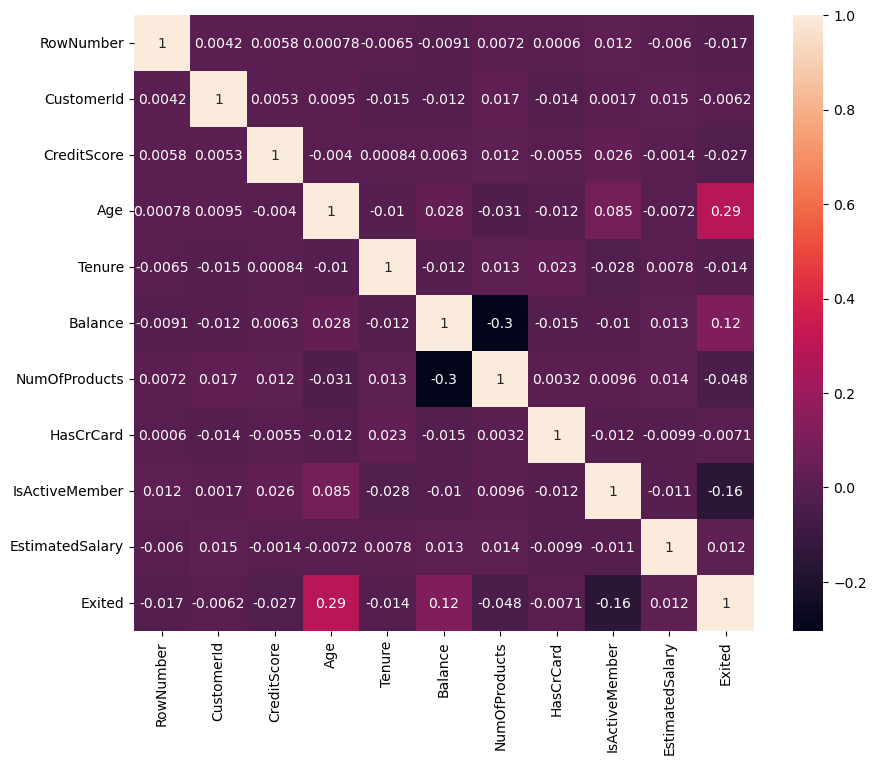

In [26]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True);

## Pair Plot

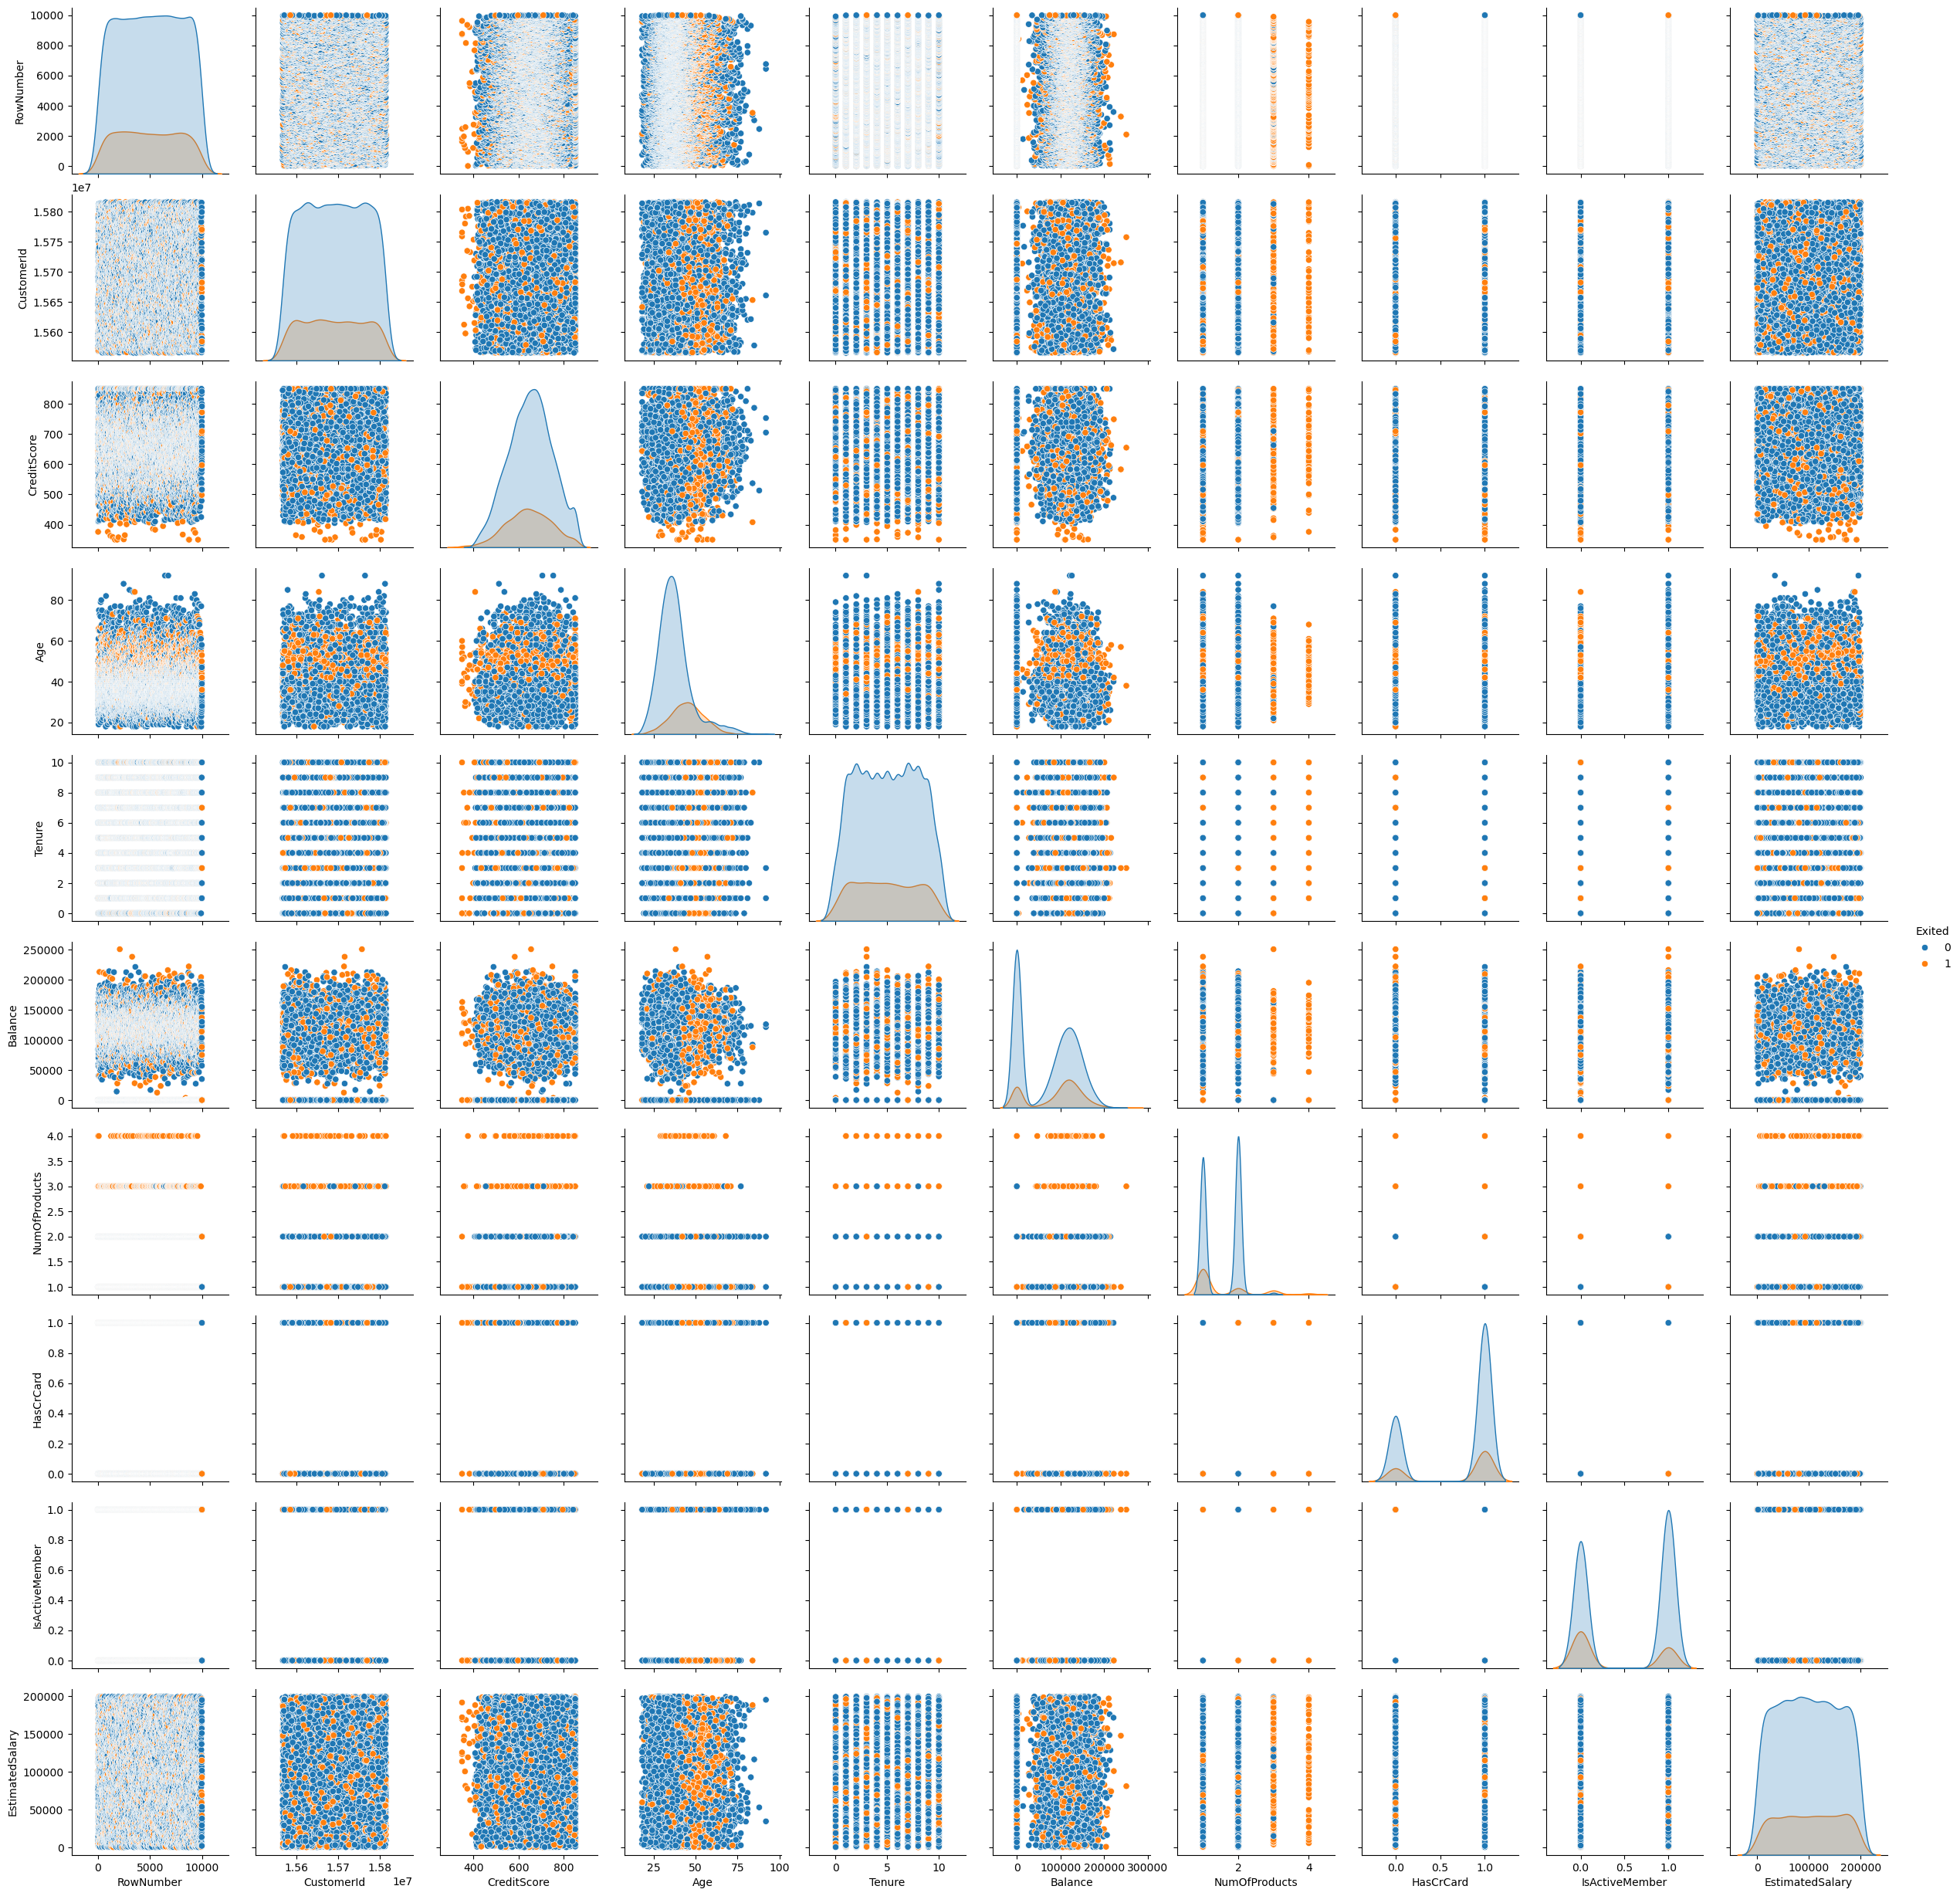

In [28]:
g = sns.pairplot(df, hue="Exited")

# Data Pre-processing

# Column Encoding

In [31]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [32]:
df_cp = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_cp

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [33]:
le = LabelEncoder()

df_cp['Gender'] = le.fit_transform(df_cp['Gender'])

In [34]:
df_cp = pd.get_dummies(df_cp, drop_first=True)
df_cp.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True

## Undersampling and Splitting the Dataset Into the Training Set and Test Set

In [36]:
X = df_cp.drop(columns=['Exited'])
y = df_cp['Exited']

In [37]:
nearmiss = NearMiss(sampling_strategy='majority')

X,y = nearmiss.fit_resample(X,y)
y.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [40]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[-5.29405406e-01,  9.89924945e-01,  1.84786324e-01, ...,
        -1.66529245e+00, -5.01533746e-01,  1.65839913e+00],
       [-2.71241173e-01, -1.01017759e+00,  4.64974893e-01, ...,
        -1.21614621e+00, -5.01533746e-01,  1.65839913e+00],
       [ 6.47823493e-01, -1.01017759e+00, -1.21615652e+00, ...,
        -1.23233021e-01, -5.01533746e-01,  1.65839913e+00],
       ...,
       [ 7.51089186e-01,  9.89924945e-01, -2.00605501e-03, ...,
        -6.94913245e-01, -5.01533746e-01, -6.02991149e-01],
       [-5.19078836e-01, -1.01017759e+00,  2.14610631e+00, ...,
        -1.52511421e+00, -5.01533746e-01, -6.02991149e-01],
       [-9.11488469e-01, -1.01017759e+00,  1.84786324e-01, ...,
         3.83894463e-01, -5.01533746e-01,  1.65839913e+00]])

In [42]:
pickle.dump(sc, open('scaler.pkl', 'wb'))

# Building the ANN

Initializing the ANN

In [45]:
ann = tf.keras.models.Sequential() # Initiate an empty ANN object

Hidden Layer 1

In [47]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

Ouput Layer

In [49]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

## Compiling the ANN

In [52]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training Set

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7500 - loss: 0.6008 - val_accuracy: 0.7742 - val_loss: 0.5311
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.5117 - val_accuracy: 0.8025 - val_loss: 0.4655
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4409 - val_accuracy: 0.8196 - val_loss: 0.4195
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.4048 - val_accuracy: 0.8344 - val_loss: 0.3882
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3622 - val_accuracy: 0.8442 - val_loss: 0.3659
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3474 - val_accuracy: 0.8540 - val_loss: 0.3502
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3273 - val_accuracy: 0.8601 - val_loss: 0.3374
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3133 - val_accu

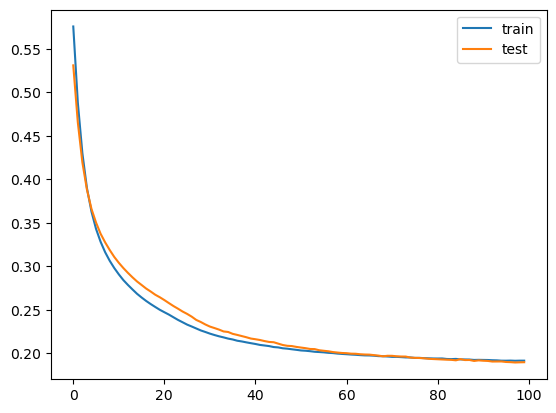

In [54]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[tensorboard_callback], validation_data=(X_test, y_test))

# plot history
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show()

# Making the Predictions and Evaluating the Model

## Predicting the Test Set Results

In [57]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Evaluating the Model

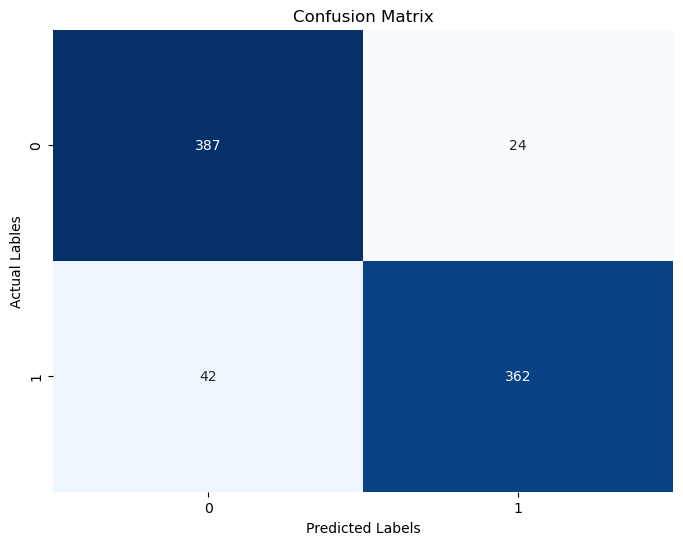

In [59]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Lables')
plt.title(f'Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       411
           1       0.94      0.90      0.92       404

    accuracy                           0.92       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.92      0.92      0.92       815



In [61]:
ann.save('model_ann.keras')